In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv(r'C:\Users\Asus\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\heart.csv')

In [6]:
data.head().transpose()

,0,1,2,3,4
age,63.0,37.0,41.0,56.0,57.0
sex,1.0,1.0,0.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0
trestbps,145.0,130.0,130.0,120.0,120.0
chol,233.0,250.0,204.0,236.0,354.0
fbs,1.0,0.0,0.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0
thalach,150.0,187.0,172.0,178.0,163.0
exang,0.0,0.0,0.0,0.0,1.0
oldpeak,2.3,3.5,1.4,0.8,0.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
data['target'].unique()

array([1, 0], dtype=int64)

In [16]:
height=data['target'].value_counts()

<AxesSubplot:xlabel='target', ylabel='count'>

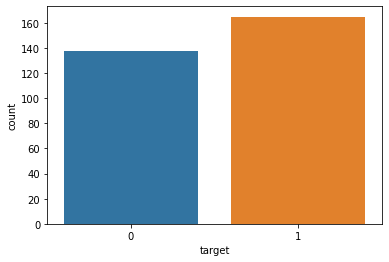

In [19]:
sns.countplot(x='target', data=data)

<Figure size 2400x1600 with 0 Axes>

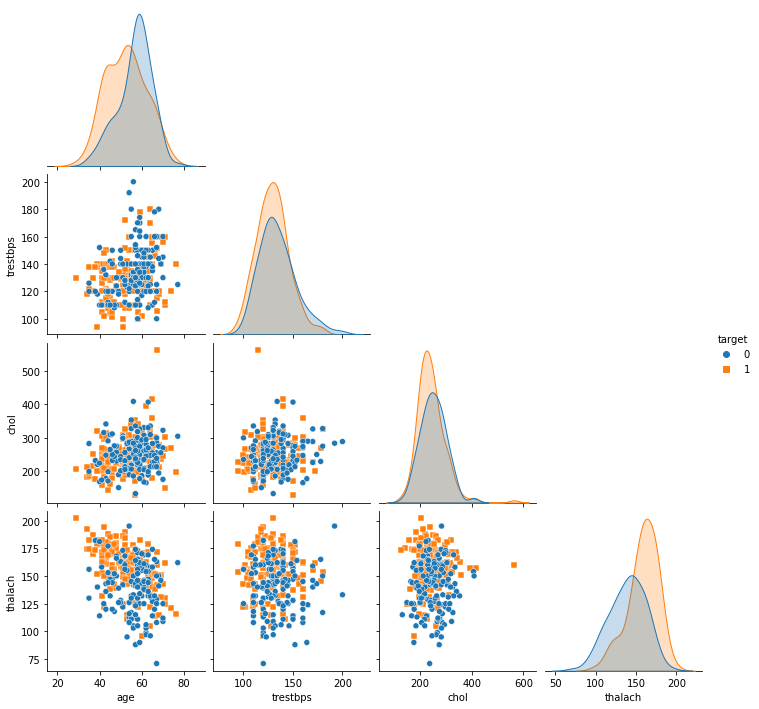

In [36]:
plt.figure(figsize=(12,8), dpi=200)
sns.pairplot(data=data, vars=['age','trestbps', 'chol','thalach'],hue='target', markers=['o','s'],corner=True)

<Figure size 2400x1600 with 0 Axes>

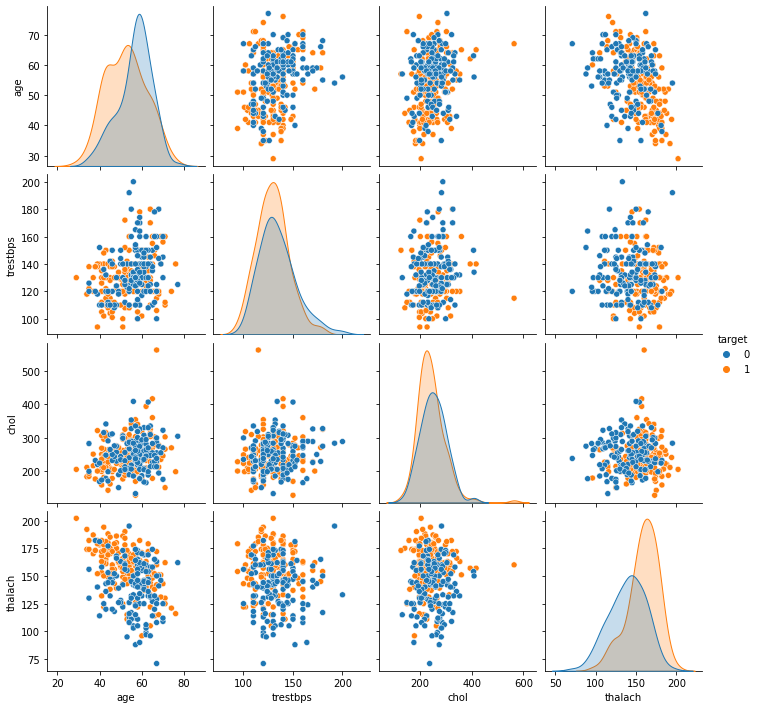

In [39]:
plt.figure(figsize=(12,8), dpi=200)
sns.pairplot(data[['age','trestbps', 'chol','thalach','target']],hue='target')

<AxesSubplot:>

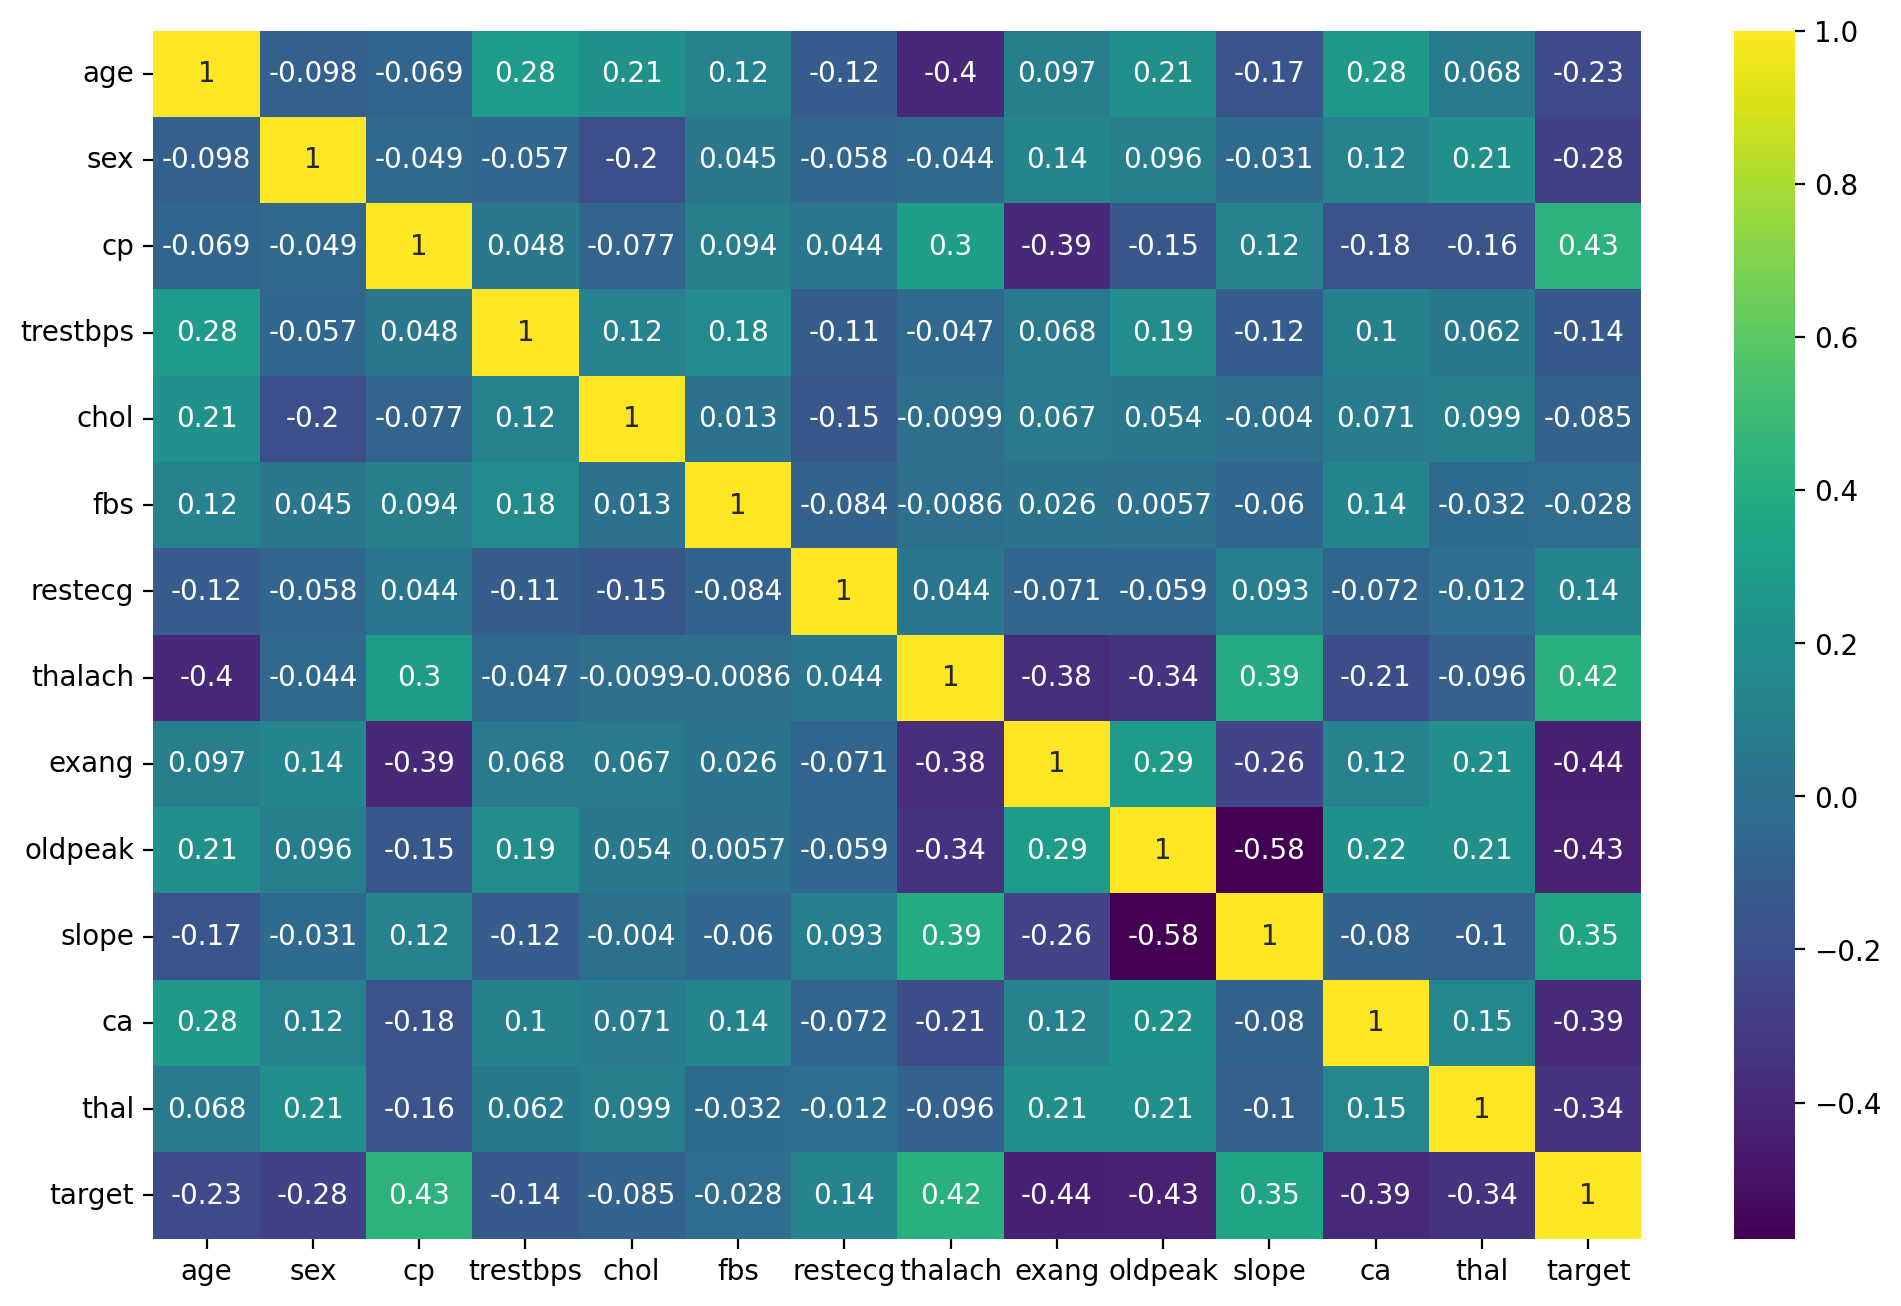

In [50]:
fig, ax=plt.subplots(figsize=(12,8), dpi=200)
sns.heatmap(data.corr(), annot=True, cmap='viridis', ax=ax)

In [52]:
from sklearn.model_selection import train_test_split

In [55]:
X=data.drop('target', axis=1)
y=data['target']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler=StandardScaler()

In [59]:
scaled_X_train = scaler.fit_transform(X_train)

In [60]:
scaled_X_test = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_r_model = LogisticRegression(solver='saga', multi_class='ovr',
                                 max_iter=1000)


grid_log_r_model = GridSearchCV(log_r_model, param_grid=param_grid)

grid_log_r_model.fit(scaled_X_train, y_train)

y_pred = grid_log_r_model.predict(scaled_X_test)

In [73]:
log_model = LogisticRegressionCV()

In [74]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [77]:
log_model.C_

array([0.04641589])

In [78]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [80]:
print(log_model.coef_)

[[-0.09621199 -0.39460154  0.53534731 -0.13850191 -0.08830462  0.02487341
   0.08083826  0.29914053 -0.33438151 -0.352386    0.25101033 -0.49735752
  -0.37448551]]


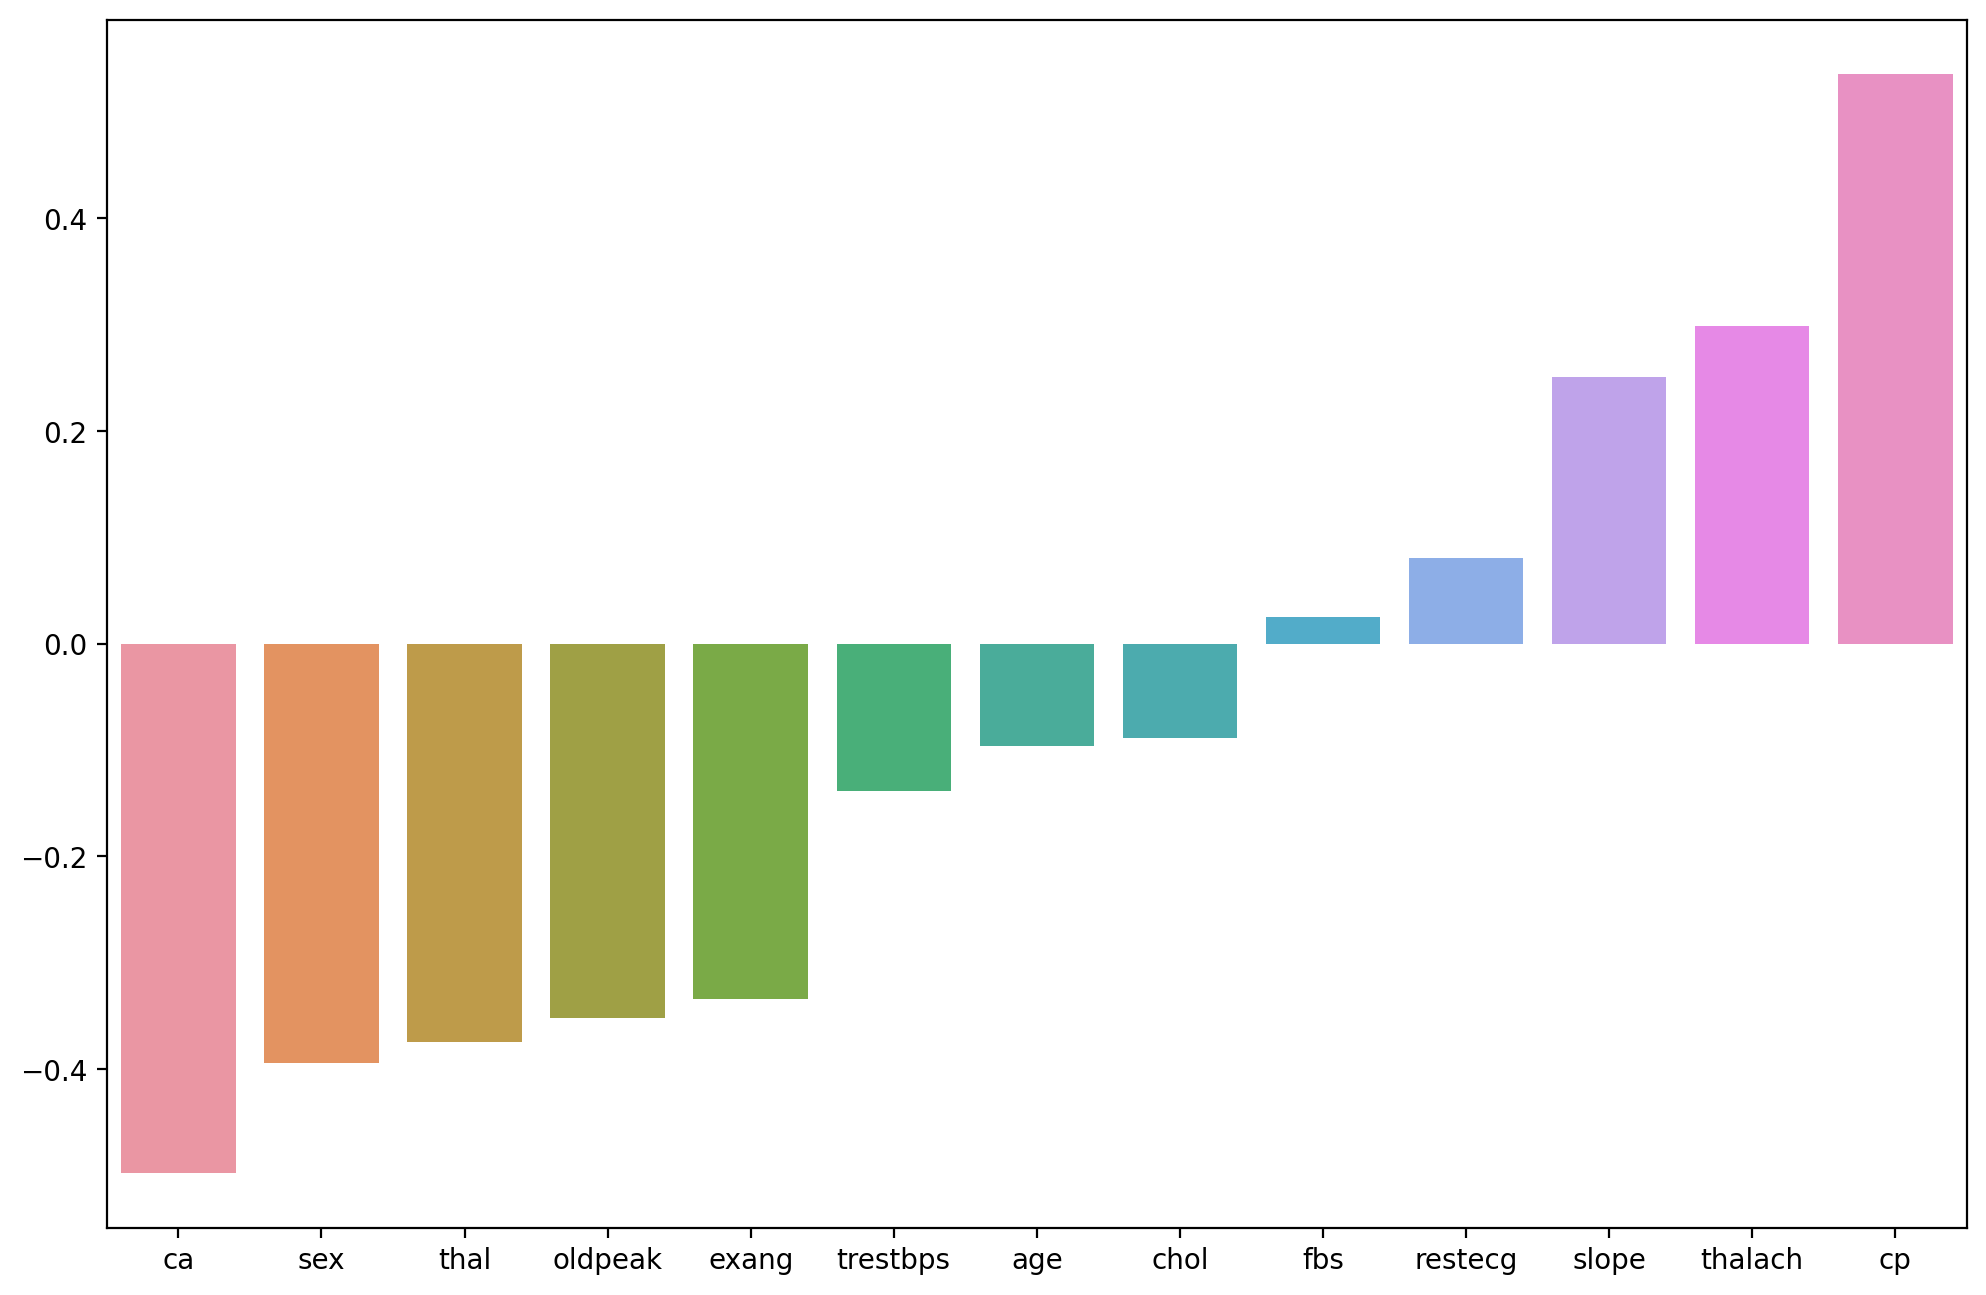

In [86]:
coef = pd.Series(index=X.columns, data=log_model.coef_[0])
coef =coef.sort_values()
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=coef.index, y=coef.values);

In [87]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [88]:
y_pred = log_model.predict(scaled_X_test)

In [89]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



D:\my_stuff\new\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


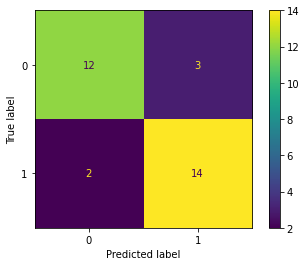

In [92]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [93]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

D:\my_stuff\new\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


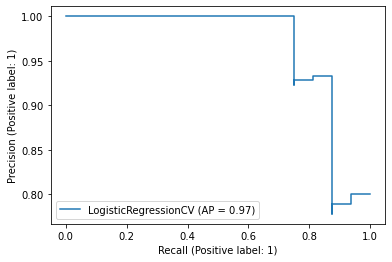

In [94]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

D:\my_stuff\new\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


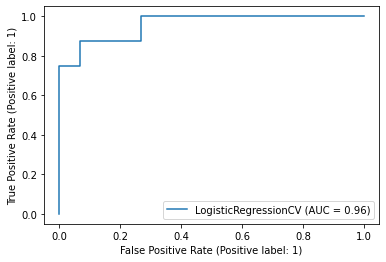

In [95]:
plot_roc_curve(log_model, scaled_X_test, y_test)

In [96]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [97]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [98]:
y_test.iloc[-1]

0

In [99]:
log_model.predict(patient)

array([0], dtype=int64)

In [100]:
log_model.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])